In [1]:
import pandas as pd
import numpy as np

file_path = ('/Users/tz/Documents/GitHub/slsim/data/MS/GGL_los_8_0_0_0_1_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt')
df = pd.read_csv(file_path, sep='\t')

mass_threshold = 1.43e13
massive_objects = df[df['M_Halo[M_sol/h]'] > mass_threshold]

# Display the table of massive objects
print(massive_objects)



                  GalID           HaloID       SubhaloID  Type  PlaneNumber  \
32      436000085008686  436000085004182  47043600001778     1           47   
39      436000085004659  436000085001580  47043600001790     1           47   
55      436000085004524  436000085001505  47043600001789     1           47   
57      436000085003026  436000085000016  47043600001761     2           47   
161     436000085005261  436000085001925  47043600001782     1           47   
...                 ...              ...             ...   ...          ...   
331089  457000090007544  457000090004138  53045700001053     1           53   
331090  457000090002187  457000090000010  53045700001033     2           53   
331091  457000090002341  457000090000010  53045700001033     2           53   
331092  457000090002952  457000090000010  53045700001033     2           53   
331095  457000090004125  457000090001533  53045700001050     1           53   

          z_spec  pos_0[rad]  pos_1[rad]  Dc_los[Mp

In [2]:
# Finding the maximum and minimum values for pos_0[rad] and pos_1[rad]
max_pos_0 = df['pos_0[rad]'].max()
min_pos_0 = df['pos_0[rad]'].min()
max_pos_1 = df['pos_1[rad]'].max()
min_pos_1 = df['pos_1[rad]'].min()

# Printing the results
print("Maximum value of pos_0[rad]:", max_pos_0)
print("Minimum value of pos_0[rad]:", min_pos_0)
print("Maximum value of pos_1[rad]:", max_pos_1)
print("Minimum value of pos_1[rad]:", min_pos_1)

Maximum value of pos_0[rad]: -0.0174534
Minimum value of pos_0[rad]: -0.034898
Maximum value of pos_1[rad]: -4.08991e-08
Minimum value of pos_1[rad]: -0.0174533


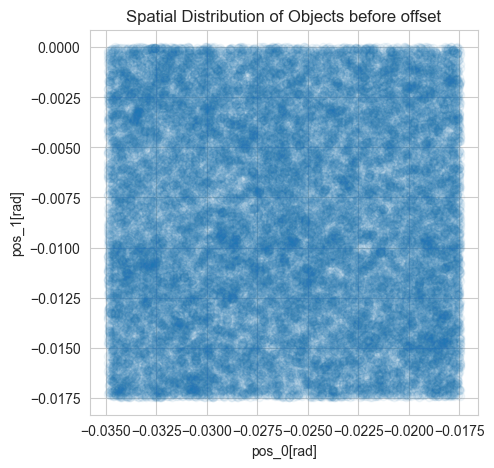

In [3]:
import matplotlib.pyplot as plt

df_sample = df.sample(frac=0.10)

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(df_sample['pos_0[rad]'], df_sample['pos_1[rad]'], alpha=0.05)
plt.xlabel('pos_0[rad]')
plt.ylabel('pos_1[rad]')
plt.title('Spatial Distribution of Objects before offset')
plt.grid(True)
plt.show()

In [4]:
# Function to convert square degrees to square radians
def sq_deg_to_sq_rad(sq_deg):
    return sq_deg * (np.pi / 180) ** 2

# Function to calculate the radius from the area
def radius_from_area(area):
    return np.sqrt(area / np.pi)

# Convert the area from square degrees to square radians
area_in_sq_rad = sq_deg_to_sq_rad(0.00082)

# Calculate the radius of the circle
radius = radius_from_area(area_in_sq_rad)
print(f"Radius: {radius} rad")

Radius: 0.00028197418977978086 rad


In [5]:
# Selecting objects within the specified area
selected_objects = df[df.apply(lambda row: np.sqrt((row['pos_0[rad]']+0.025) **2+ (row['pos_1[rad]']+0.01) **2) <= radius, axis=1)]

# Displaying the results
print(f"Radius: {radius}")
print(f"Number of selected objects: {len(selected_objects)}")
selected_objects.head()  # Display the first few rows of the selected objects

Radius: 0.00028197418977978086
Number of selected objects: 287


,GalID,HaloID,SubhaloID,Type,PlaneNumber,z_spec,pos_0[rad],pos_1[rad],Dc_los[Mpc/h],M_Halo[M_sol/h],M_Subhalo[M_sol/h],M_Stellar[M_sol/h],mag_SDSS_u,mag_SDSS_g,mag_SDSS_r,mag_SDSS_i,mag_SDSS_z,mag_J,mag_H,mag_K
2945,44000651000071,44000651000021,42004400004420,2,42,0.922373,-0.025125,-0.010042,2238.37,7.900830e+11,0.000000e+00,9.422010e+09,28.4630,27.2460,25.3966,24.3678,23.5274,22.8135,22.3488,22.0177
2946,44000651000021,44000651000021,42004400004420,0,42,0.920775,-0.025123,-0.010036,2238.38,7.900830e+11,7.900830e+11,1.290450e+10,22.5726,22.4186,22.0252,21.4202,21.0792,20.8763,20.6714,20.5533
3023,29005501000021,29005501000021,42002800014424,0,42,0.857266,-0.025186,-0.010002,2116.65,5.422140e+10,5.422140e+10,6.291850e+08,26.3726,26.3657,26.0364,25.3897,24.8661,24.4683,24.2400,24.1292
3031,35007180000196,35007180000117,42003400006277,0,42,0.905872,-0.025222,-0.010162,2205.74,2.470080e+11,2.470080e+11,3.656390e+09,24.0246,23.9283,23.6117,23.0067,22.6137,22.3576,22.1518,22.0391
3355,35007748000021,35007748000021,42003400004979,0,42,0.904980,-0.024877,-0.010153,2204.10,3.356560e+11,3.356560e+11,7.510890e+09,22.9377,22.7744,22.4409,21.8438,21.5134,21.3327,21.1519,21.0527


In [6]:
from astropy.table import Table
import pandas as pd
import numpy as np

# Assuming 'selected_objects' is already created from your previous steps
# Filter the required columns
filtered_data = selected_objects[['z_spec', 'M_Halo[M_sol/h]', 'pos_0[rad]', 'pos_1[rad]']]

# Convert the filtered DataFrame to an Astropy Table
astropy_table = Table.from_pandas(filtered_data)

# Add custom headers/labels if needed
# For example, to rename the columns:
astropy_table.rename_column('z_spec', 'Redshift')
astropy_table.rename_column('M_Halo[M_sol/h]', 'Halo Mass')
astropy_table.rename_column('pos_0[rad]', 'Position 0')
astropy_table.rename_column('pos_1[rad]', 'Position 1')

center_point = (0.0, 0.0)  # Replace with your actual center point
astropy_table.meta['Center_Point'] = center_point

# Display the table
print(astropy_table)
print("Metadata:", astropy_table.meta)

Redshift    Halo Mass    Position 0  Position 1
-------- --------------- ---------- -----------
0.922373  790083000000.0  -0.025125  -0.0100417
0.920775  790083000000.0 -0.0251234   -0.010036
0.857266   54221400000.0 -0.0251864   -0.010002
0.905872  247008000000.0 -0.0252221  -0.0101616
 0.90498  335656000000.0 -0.0248766  -0.0101532
 0.90553   55082000000.0 -0.0250365  -0.0102524
0.931892   78319800000.0 -0.0249396  -0.0101551
0.913574  190205000000.0 -0.0249319  -0.0100515
0.933501   28401700000.0 -0.0248603 -0.00997812
0.908244   63688600000.0 -0.0250265 -0.00983423
     ...             ...        ...         ...
0.126966   10327900000.0 -0.0250931 -0.00983815
 2.85934 1576720000000.0 -0.0250543 -0.00989416
 2.86197  266804000000.0 -0.0249685  -0.0102446
 2.75238  111885000000.0 -0.0249814 -0.00981029
 2.86416  445820000000.0   -0.02493  -0.0101494
 2.80341   97254200000.0 -0.0249034 -0.00993918
0.860407   52500100000.0 -0.0252587 -0.00992262
0.840458 1096480000000.0 -0.0251127  -0.

In [7]:
from slsim.Halos.read_millennium import ReadMS
from slsim.Halos.ms_halos_lens import HalosMSLens
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()
ReadMS = ReadMS( file_path='/Users/tz/Documents/GitHub/slsim/data/MS/GGL_los_8_0_0_0_1_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt',
            selecting_area=0.00082,
            z_source=5,
            cosmo=None,
            sample_size=1,)
tables=ReadMS.get_tables()
print(tables)


/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


[<Table length=251>
   z            mass                 px                  py        
float64       float64             float64             float64      
-------- ------------------ ------------------- -------------------
 0.57864  87770174401.41887  -5.570001286854301  14.854503806541809
0.566035  622023352054.3896  -31.57999335461326  29.328105260900657
0.565407  31800768548.62548  -51.56705307995699 -2.0055814560957272
0.486442  67417676618.38605   34.96103314069988  -42.30972459677837
 0.56593  2293467336683.417   -17.3064687623138   -35.6226195782475
0.361779 17808454034.880283   35.66233348194014 -37.703831473280694
0.903477 1357258350576.4116   32.34147010136228  -37.06853587003965
0.903988 17808454034.880283  13.757011058498348 -43.417366606325324
0.907594 111938811705.58676  -7.343878620579529  -57.64757558931243
0.905939 1077410582323.3816  27.184849945184727   -8.16877386675904
     ...                ...                 ...                 ...
 2.47983  211157256872.5983 

In [8]:
from slsim.Halos.ms_calculating import calculate_kappa_gamma_with_muiltprocessing,kappa_gamma_from_files
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()

all_kappa, all_gamma=   kappa_gamma_from_files(file_path='/Users/tz/Documents/GitHub/slsim/data/MS',
                                               selecting_area=0.00082,
                                               z_source=20,
                                               cosmo=cosmology,
                                               sample_size=5,
                                               gamma12=False,
                                               diff=1.0,
                                               diff_method="square")

/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/s

In [9]:
print(all_kappa, all_gamma)

[0.5847372096311338, 0.7344186040035008, 0.423589703964494, 0.8530609758494059, 1.5338237621195376, 0.5052695521651112, 0.38423435072747314, 0.816688981062861, 1.5946368092504724, 0.9005584598969101, 0.6945612919250403, 1.1560695093359943, 1.4525572519575078, 1.4438990209881974, 0.7563054804108046, 0.6735101546792426, 0.5802063843636208, 0.6357015578103801, 0.41617147844170044, 1.480094163751483, 0.6257176281260207, 1.1192675329788102, 0.4926375946026932, 2.2641096908253573, 1.1677286895835748, 0.41230673042465005, 0.9126999918661965, 0.2584431835461017, 0.8905390637460687, 0.5140265665392423, 0.42841442391339624, 0.6893983949290842, 0.21457292969913228, 0.7546434146538257, 0.641332455463625, 0.8083707064249102, 0.681439817153394, 0.5705894263093532, 0.8123689172303195, 0.9951265210224047, 0.7272802481251088, 0.3578713331013702, 1.8960842426592532, 0.8377495120999923, 1.9976553663315468, 0.41839895080031503, 0.39797445439085477, 0.739901843843848, 1.2036718499428236, 0.8931622344117776

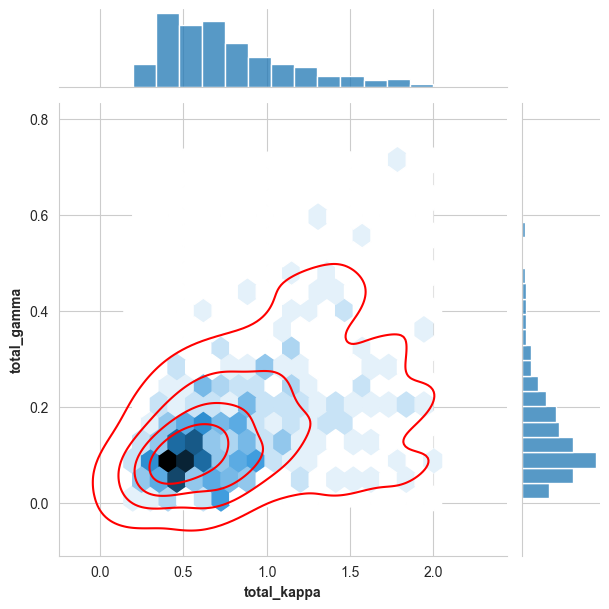

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_kappa_flat = np.concatenate(all_kappa) if isinstance(all_kappa[0], np.ndarray) else np.hstack(all_kappa)
all_gamma_flat = np.concatenate(all_gamma) if isinstance(all_gamma[0], np.ndarray) else np.hstack(all_gamma)

# Apply the condition all_kappa_flat < 2
filtered_kappa = all_kappa_flat[all_kappa_flat < 2]
filtered_gamma = all_gamma_flat[all_kappa_flat < 2]

# Create the joint plot
filtered_plot = sns.jointplot(x=filtered_kappa, y=filtered_gamma, kind='hex')
filtered_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
filtered_plot.ax_joint.set_xlabel('total_kappa', fontweight='bold')
filtered_plot.ax_joint.set_ylabel('total_gamma', fontweight='bold')
plt.show() 

In [11]:
from slsim.Halos.ms_calculating import get_halos_mass_with_muiltprocessing,get_mass_z_from_files

ms_all_masses, ms_all_zs, ms_number = get_mass_z_from_files(file_path='/Users/tz/Documents/GitHub/slsim/data/MS', 
                                                            selecting_area=0.00082, z_source=4.0, cosmo=None, mass_cut=1e12, sample_size=20)
print(len(ms_all_masses), len(ms_all_zs),  len(ms_number))

/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/s

54231 54231 1280


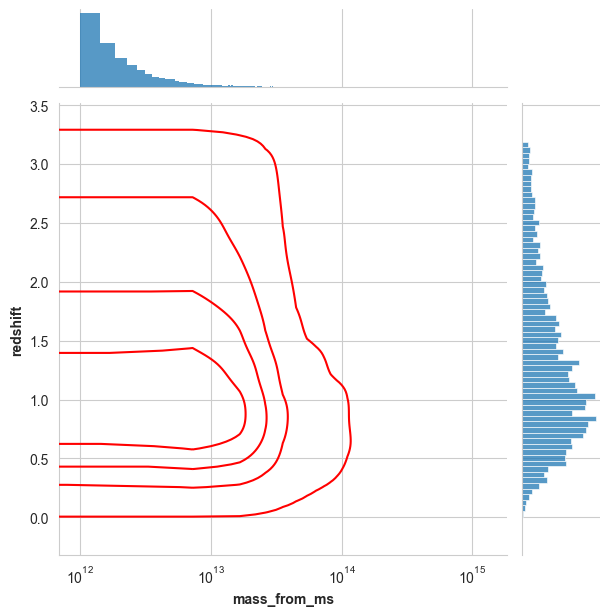

[58, 43, 31, 47, 31, 34, 35, 32, 47, 48, 38, 45, 26, 37, 36, 39, 41, 45, 24, 22, 39, 53, 31, 50, 18, 49, 27, 25, 40, 39, 36, 50, 48, 33, 44, 61, 33, 53, 46, 28, 72, 59, 42, 37, 40, 28, 52, 37, 47, 49, 47, 29, 51, 56, 30, 34, 64, 49, 58, 41, 114, 40, 28, 33, 43, 57, 41, 28, 43, 41, 25, 35, 51, 36, 35, 50, 25, 35, 41, 32, 35, 59, 44, 39, 44, 37, 48, 55, 32, 44, 50, 48, 51, 36, 30, 45, 45, 20, 35, 56, 36, 39, 36, 26, 42, 23, 32, 45, 46, 57, 65, 27, 32, 48, 62, 25, 67, 35, 31, 36, 44, 38, 42, 38, 33, 62, 58, 49, 44, 51, 43, 43, 28, 37, 40, 60, 40, 38, 56, 53, 33, 80, 51, 37, 44, 41, 36, 25, 38, 34, 38, 52, 42, 39, 34, 32, 56, 17, 57, 48, 26, 43, 25, 26, 42, 60, 58, 68, 34, 56, 40, 32, 26, 32, 49, 26, 37, 23, 41, 33, 42, 32, 28, 41, 31, 49, 52, 51, 38, 32, 30, 44, 45, 23, 29, 40, 28, 37, 19, 27, 54, 21, 37, 40, 72, 33, 22, 71, 46, 56, 23, 25, 32, 47, 48, 57, 32, 58, 34, 46, 25, 44, 54, 29, 54, 55, 31, 34, 39, 20, 42, 22, 34, 63, 33, 39, 40, 47, 45, 50, 64, 43, 54, 45, 36, 67, 56, 33, 43, 49

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the joint plot
plot_ms_halos = sns.jointplot(x=ms_all_masses, y=ms_all_zs, kind='hex')
plot_ms_halos.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
plot_ms_halos.ax_joint.set_xlabel('mass_from_ms', fontweight='bold')
plot_ms_halos.ax_joint.set_ylabel('redshift', fontweight='bold')
plt.xscale('log')
plt.show()

print(ms_number)

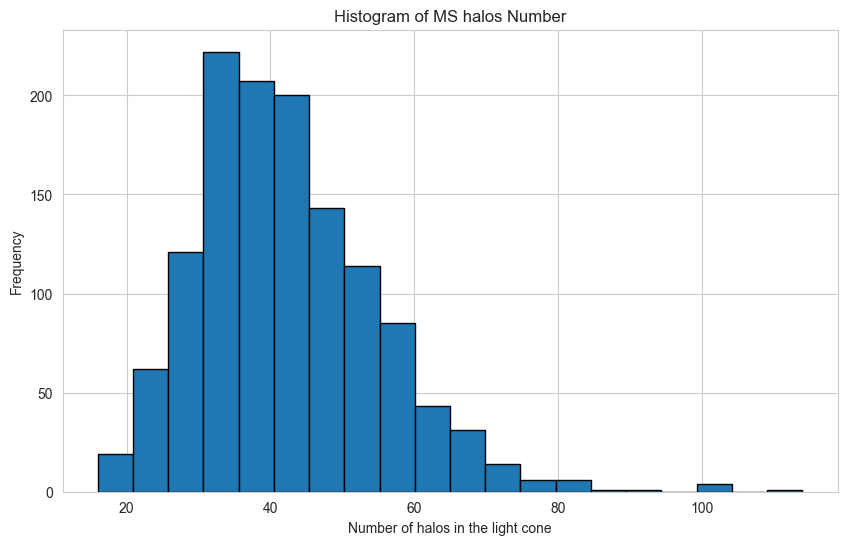

In [13]:
plt.figure(figsize=(10, 6)) 
plt.hist(ms_number, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of MS halos Number')
plt.xlabel('Number of halos in the light cone')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [14]:
from slsim.Halos.halos_plus_glass import run_halos_by_multiprocessing


all_masses_rendering, all_zs_rendering, all_lengths_rendering = run_halos_by_multiprocessing(m_min_str='1.0E+12',
                                                m_max_str='1.0E+16',
                                                m_min=1e12,
                                                m_max=1e16,
                                                z_max=3.0,
                                                n_iterations=1000,                                               
                                                sky_area=0.00082)
print( all_masses_rendering, all_zs_rendering, all_lengths_rendering)


/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/tz/Documents/GitHub/slsim/venv/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/s

The 1000 halo-lists took 60.50361895561218 seconds to run
[3419251923426.434, 1252381191255.3167, 1361562894170.9204, 1196736879932.3372, 1033779073735.2843, 1100026595353.2483, 1022232437522.0669, 2641973610135.8696, 1601092133534.0579, 1696886225231.5317, 1439458133863.0374, 2908212121421.316, 1521270481556.0408, 2407870172041.5283, 1198943016750.6924, 1485369920035.41, 1198061748555.781, 3274926404621.7793, 2363492993251.829, 1150434834457.3604, 4279018356113.862, 1143473272993.5054, 1558649233195.3928, 10346620720805.781, 2373511989292.005, 4075599114020.7134, 1785093808702.9248, 6829215807816.971, 4961688432043.559, 1250186762409.4058, 1484718546061.6934, 1299608854575.6746, 1342002876288.2515, 2069479025571.375, 1480518193870.8115, 2466714299369.351, 17345757909562.637, 13230213713981.615, 1263521752775.4368, 1352954907960.95, 2173771387984.9888, 1306185339144.1694, 1267944580231.5144, 4569055352623.709, 1040928766325.1438, 4646233850091.351, 2056679852964.9744, 1223197287110.520

In [15]:
print(len(ms_all_zs),len(ms_all_masses),len(all_masses_rendering))

54231 54231 25718


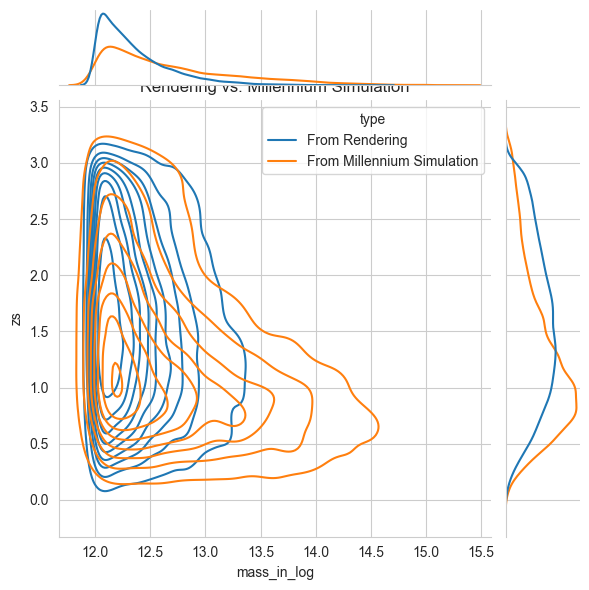

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

log_all_masses_rendering = np.log10(all_masses_rendering)
log_ms_all_masses = np.log10(ms_all_masses)

df1 = pd.DataFrame({'mass_in_log': log_all_masses_rendering, 'zs': all_zs_rendering, 'type': 'From Rendering'})
df2 = pd.DataFrame({'mass_in_log': log_ms_all_masses, 'zs': ms_all_zs, 'type': 'From Millennium Simulation'})

if len(df1) > len(df2):
    df1 = df1.sample(n=len(df2), random_state=1)  
elif len(df2) > len(df1):
    df2 = df2.sample(n=len(df1), random_state=1)

df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

df_total = pd.concat([df1, df2], axis=0)

sns.jointplot(data=df_total, x="mass_in_log", y="zs", hue="type", kind="kde")
plt.title('Rendering vs. Millennium Simulation')
plt.show()

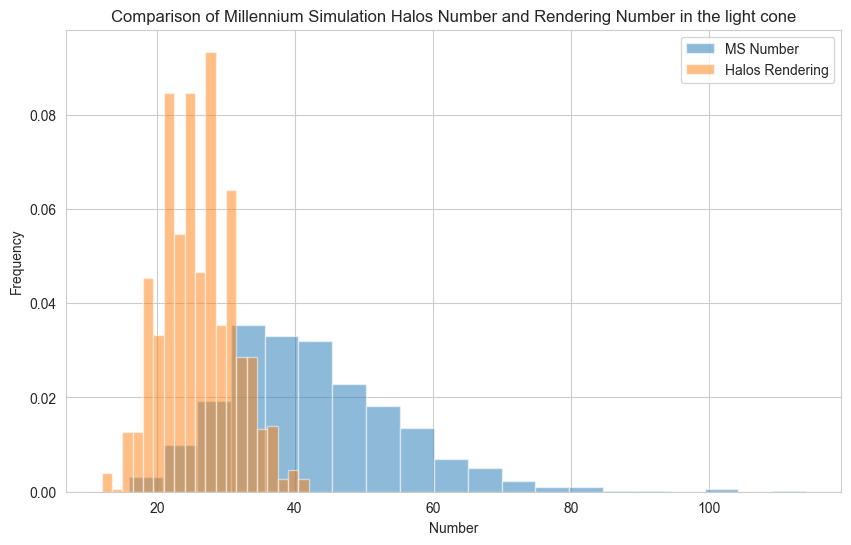

In [17]:
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(ms_number, bins=20, alpha=0.5, density=True, label='MS Number')
plt.hist(all_lengths_rendering, bins=20, alpha=0.5, density=True, label='Halos Rendering')

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Comparison of Millennium Simulation Halos Number and Rendering Number in the light cone')
plt.legend()  
plt.show()

331227
301345
                  GalID           HaloID       SubhaloID  Type  PlaneNumber  \
0        35006956001078   35006956000454  42003400001872     1           42   
3        35006956000380   35006956000021  42003400001868     2           42   
8        35007115000481   35007115000190  42003400002664     1           42   
30      436000102003348  436000102001590  47043600002337     1           47   
32      436000085008686  436000085004182  47043600001778     1           47   
...                 ...              ...             ...   ...          ...   
331205   15000231000210   15000231000018  45001400004126     2           45   
331208   15000231000254   15000231000098  45001400004128     1           45   
331216   15000246000018   15000246000018  45001400004540     0           45   
331220  157009545000034  157009545000034  29015700000580     0           29   
331221  157009545000304  157009545000432  29015700001567     0           29   

          z_spec  pos_0[rad]  pos_1[r

/var/folders/2d/zqs_vr2n65q9fsqw5kq8wmqw0000gn/T/ipykernel_33334/1768219284.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  massive_objects['M_Halo[M_sol/h]'] /= default_cosmology.get().h


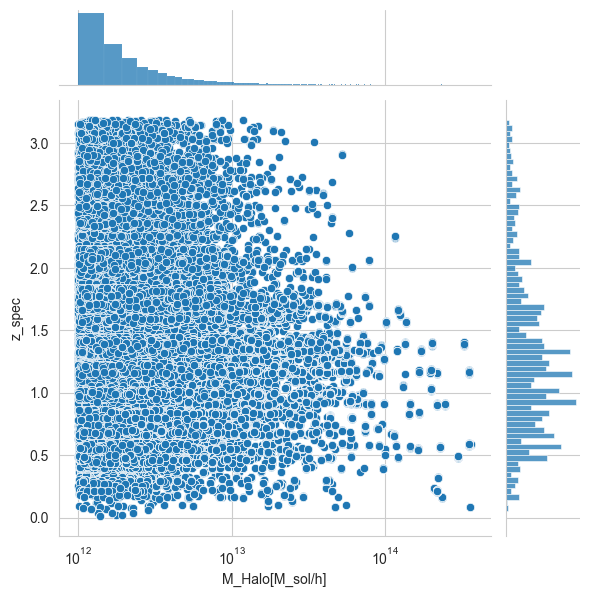

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = ('/Users/tz/Documents/GitHub/slsim/data/MS/GGL_los_8_0_0_0_1_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt')
df = pd.read_csv(file_path, sep='\t')
print(len(df))
df.drop_duplicates(subset='HaloID', inplace=True)
print(len(df))

from astropy.cosmology import default_cosmology

mass_threshold = 1e12 * default_cosmology.get().h
massive_objects = df[df['M_Halo[M_sol/h]'] > mass_threshold]

# Display the table of massive objects
print(massive_objects)
massive_objects['M_Halo[M_sol/h]'] /= default_cosmology.get().h
g = sns.jointplot(x='M_Halo[M_sol/h]', y='z_spec', data=massive_objects, kind="scatter")
g.ax_joint.set_xscale('log')
plt.show()

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the file path
file_path = '/Users/tz/Documents/GitHub/slsim/data/MS'

# Use glob to find all .txt files in the directory
txt_files = glob.glob(os.path.join(file_path, '*.txt'))

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file, read it into a DataFrame, and append it to the list
for file in txt_files:
    df = pd.read_csv(file, sep='\t')
    df.drop_duplicates(subset='HaloID', inplace=True)
    dfs.append(df)

# Concatenate all the DataFrames into one large DataFrame
df.drop_duplicates(subset='HaloID', inplace=True)

all_halos = pd.concat(dfs)

# Filter for halos within the desired redshift range and above the mass threshold
filtered_halos = all_halos[(all_halos['z_spec'] >= 0.65) & (all_halos['z_spec'] <= 0.75) & (all_halos['M_Halo[M_sol/h]'] >= 1e12)]



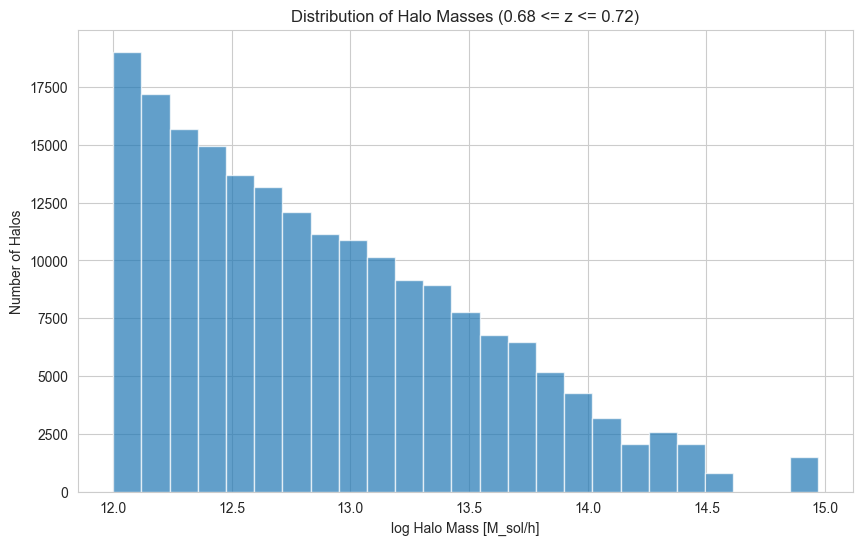

In [2]:

# Plot the mass distribution of these filtered halos
plt.figure(figsize=(10, 6))
plt.hist(np.log10(filtered_halos['M_Halo[M_sol/h]']), bins=25, alpha=0.7)
plt.xlabel('log Halo Mass [M_sol/h]')
plt.ylabel('Number of Halos')
plt.title('Distribution of Halo Masses (0.68 <= z <= 0.72)')
plt.grid(True)
plt.show()

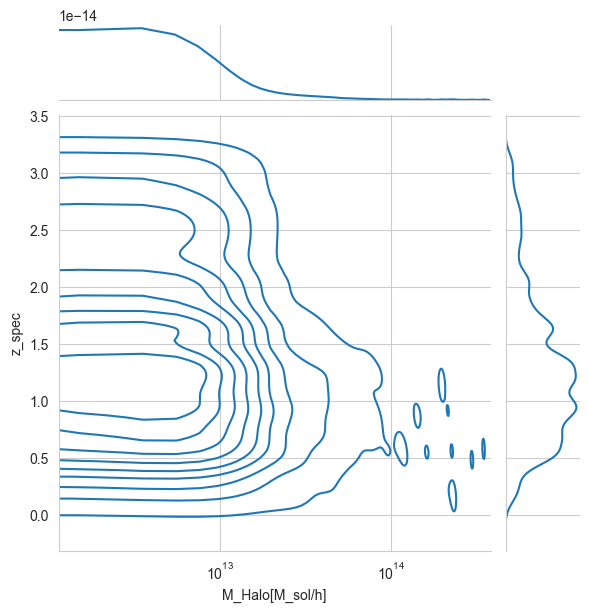

In [19]:
g = sns.jointplot(x='M_Halo[M_sol/h]', y='z_spec', data=massive_objects, kind="kde")
g.ax_joint.set_xscale('log')
plt.show()